In [1]:
#Neural network program using Long Short Term Memory (LSTM) to predict future stock prices

In [2]:
#Download Libraries (Downloads libraries to your computer automatically)
import sys
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install pandas_datareader
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install beautifulsoup4
!{sys.executable} -m pip install datetime

#Import Libraries (Import libraries to this program)
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from datetime import datetime , timedelta
import seaborn as sns
plt.style.use('fivethirtyeight')

  Using cached DateTime-4.3-py2.py3-none-any.whl (60 kB)


In [5]:
today = datetime.today()
six_months_ago =  datetime.today() - timedelta(days = 252)
start_date = "2015-1-1"
days_to_forecast= 252
simulation_trials= 10000

In [6]:
data = pd.DataFrame()


def import_stock_data(tickers, start, end = datetime.today().strftime('%Y-%m-%d')):
    data = pd.DataFrame()
    if len([tickers]) == 1:
        data[tickers] = web.DataReader(tickers, data_source='yahoo', start = start)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = web.DataReader(t, data_source='yahoo', start = start)['Adj Close']
    return(data)

                  AAPL        MSFT        AMD       BILI
Date                                                    
2015-01-02   24.696352   41.539135   2.670000        NaN
2015-01-05   24.000614   41.157158   2.660000        NaN
2015-01-06   24.002876   40.553074   2.630000        NaN
2015-01-07   24.339447   41.068310   2.580000        NaN
2015-01-08   25.274624   42.276463   2.610000        NaN
...                ...         ...        ...        ...
2020-12-07  123.750000  214.289993  94.070000  72.550003
2020-12-08  124.379997  216.009995  92.919998  75.300003
2020-12-09  121.779999  211.800003  89.830002  73.059998
2020-12-10  123.239998  210.520004  91.660004  75.709999
2020-12-11  122.410004  213.259995  91.650002  75.910004

[1498 rows x 4 columns]


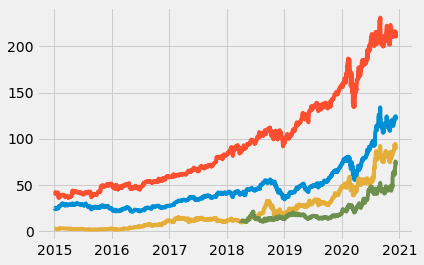

In [14]:
ticker =['AAPL','MSFT','AMD','BILI']
stocks_df = import_stock_data(ticker, start_date, today)
print(stocks_df)
plt.plot(stocks_df)